# Read a NetCDF for xz-time PDE solved on triangular unstructured grid


    -Author: Niccolò Tubini and Riccardo Rigon
    -License: Creative Commons 4.0


In [650]:
%%capture
%run Richards1DOutput.py

#from netCDF4_classic import Dataset
from netCDF4 import Dataset


import os

## pandas
import pandas as pd

## numpy
import numpy as np

## plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#import matplotlib.transforms as transforms
#import matplotlib.gridspec as gridspec
#import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib import rc

## to convert unix time to human readable date
import time
import datetime


import scipy.interpolate as interp
#################
# Plot settings #
#################

# FIGURE SIZE
AxesWidth  = 15; #inch
AxesHeight = AxesWidth/1.618; # inch
plt.rc('figure', figsize=(AxesWidth,AxesHeight))

# AXES
plt.rc('axes', edgecolor='black',axisbelow=True, grid=True)

# GRID
plt.rc('grid', color='lightgray', linestyle='solid')

# TICKS
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
# FONTS
font = {'family' : 'sans-serif','weight' : 'normal','size'   : 25}
plt.rc('font', **font)
plt.rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')


In [219]:
#os.chdir("C:/Users/Niccolo/eclipse-workspace/NetCDF/resources/output")
os.chdir("C:/Users/Niccolo/eclipse-workspace/Richards2D/resources/")
os.listdir()

['boundary_conditions', 'domain_slope', 'input', 'output', 'output.nc']

In [220]:
fileName = 'output.nc'

In [668]:
## open netCDF file for reading.
ncfile = Dataset(fileName,'r') 
print ('*** SUCCESS reading')
  
print('\n ***FILE INFO:\n')
print(ncfile)

*** SUCCESS reading

 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description_of_the_problem:  Prova 2D
    dimensions(sizes): z(221), x(221), xDual(351), zDual(351), time(61)
    variables(dimensions): float64 z(z), float64 x(x), float64 dual_x(xDual), float64 dual_z(zDual), int32 time(time), float64 psi(time,x), float64 psiIC(x), float64 theta(time,x), float64 darcyVelocities(time,xDual), float64 darcyVelocitiesX(time,xDual), float64 darcyVelocitiesZ(time,xDual)
    groups: 



In [669]:
z = ncfile.variables['z']
zDual = ncfile.variables['dual_z']
x = ncfile.variables['x']
xDual = ncfile.variables['dual_x']
time = ncfile.variables['time']
ic = ncfile.variables['psiIC']
psi = ncfile.variables['psi']
theta = ncfile.variables['theta']
velocity = ncfile.variables['darcyVelocities']
u = ncfile.variables['darcyVelocitiesX']
v = ncfile.variables['darcyVelocitiesZ']


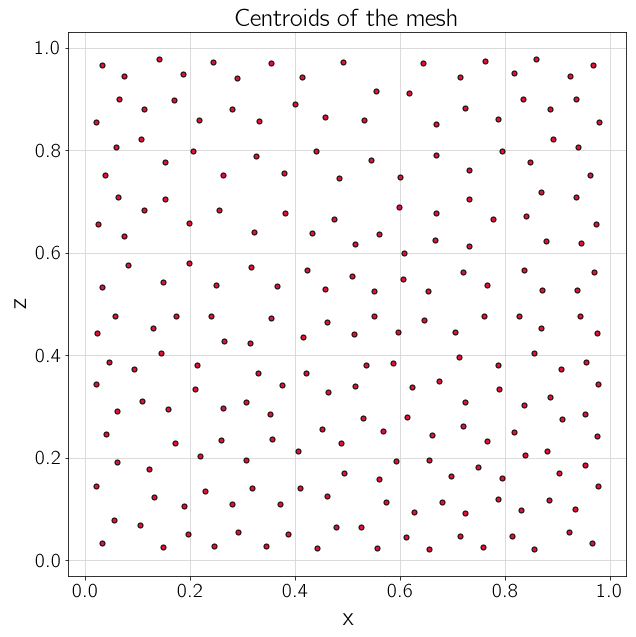

In [670]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(x[:], z[:], marker=".", c="#DC143C", edgecolors="black", s=100)
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.title("Centroids of the mesh", fontsize=25)
plt.show()

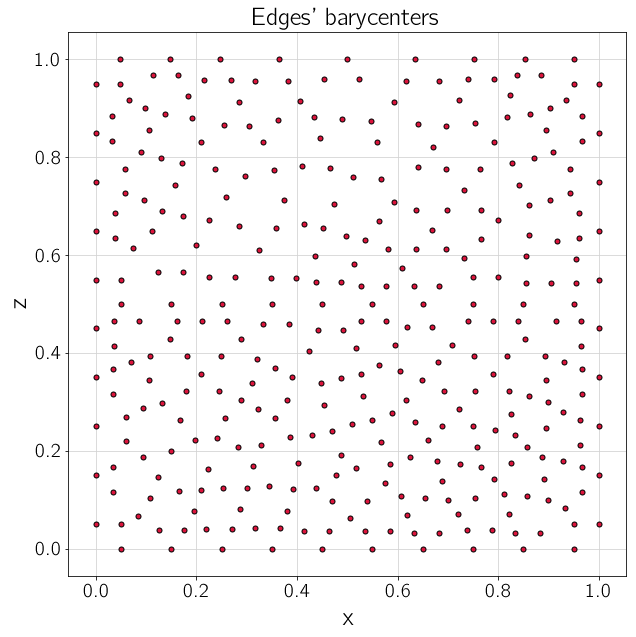

In [671]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(xDual[:], zDual[:], marker=".", c="#DC143C", edgecolors="black", s=100)
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.title("Edges' barycenters", fontsize=25)
plt.show()

In [672]:
x_g = y_g = np.linspace(0,1,50)
X_g, Y_g = np.meshgrid(x_g, y_g)


In [673]:
timeIndex = 3

## Interpolate results on a regular grid

https://stackoverflow.com/questions/37872171/how-can-i-perform-two-dimensional-interpolation-using-scipy

#### scipy.interpolate.Rbf

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html

**function : str or callable, optional**:

`'multiquadric'`: sqrt((r/self.epsilon)**2 + 1)

`'inverse'`: 1.0/sqrt((r/self.epsilon)**2 + 1)

`'gaussian'`: exp(-(r/self.epsilon)**2)

`'linear'`: r

`'cubic'`: r**3

`'quintic'`: r**5

`'thin_plate'`: r**2 * log(r)

If callable, then it must take 2 arguments (self, r). The epsilon parameter will be available as self.epsilon. Other keyword arguments passed in will be available as well.

**epsilon : float, optional**

Adjustable constant for gaussian or multiquadrics functions - defaults to approximate average distance between nodes (which is a good start).


**smooth : float, optional**

Values greater than zero increase the smoothness of the approximation. 0 is for interpolation (default), the function will always go through the nodal points in this case.

**norm : str, callable, optional**

A function that returns the ‘distance’ between two points, with inputs as arrays of positions (x, y, z, …), and an output as an array of distance. E.g., the default: ‘euclidean’, such that the result is a matrix of the distances from each point in x1 to each point in x2. For more options, see documentation of scipy.spatial.distances.cdist.

In [674]:
zfun_smooth_rbf = interp.Rbf(x[:], z[:], ic[:], function='linear', smooth=0,epsilon=1)  # default smooth=0 for interpolation
z_dense_smooth_rbf = zfun_smooth_rbf(X_g, Y_g)  # not really a function, but a callable class instance

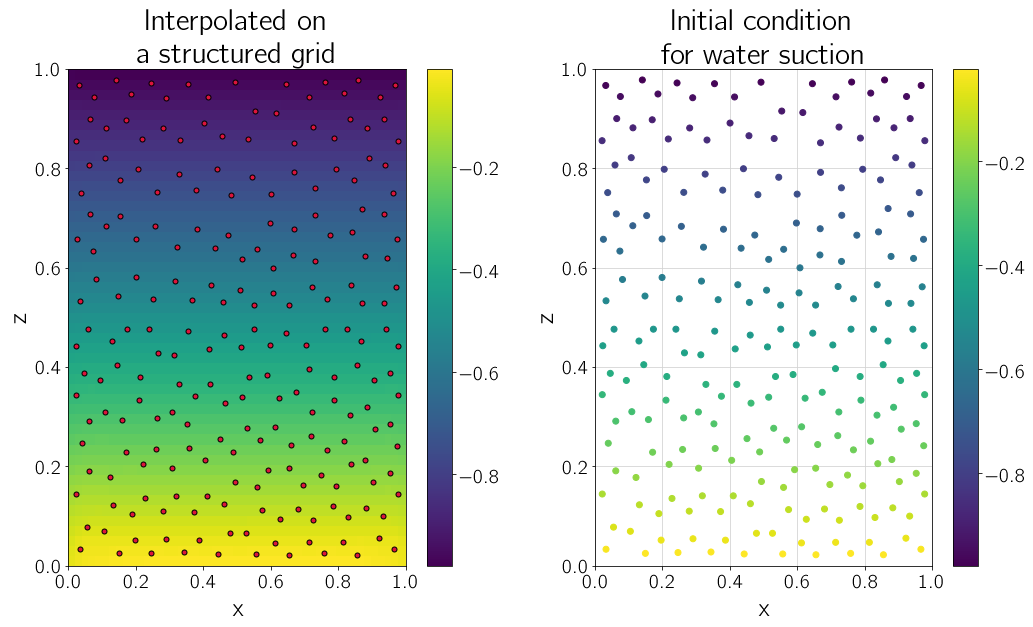

In [678]:
plt.figure(figsize=(15,15/1.618))
plt.subplot(121)
plt.pcolor(X_g,Y_g,z_dense_smooth_rbf)
plt.colorbar()
plt.scatter(x[:], z[:], marker=".", c="#DC143C", edgecolors="black", s=100)
plt.title("Interpolated on \n a structured grid")
plt.xlabel("x")
plt.ylabel("z")


plt.subplot(122)
plt.scatter(x[:], z[:], c=ic[:], cmap='viridis', vmin=min(ic[:]), vmax=max(ic[:]))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.colorbar()
plt.title("Initial condition\n for water suction")
plt.xlabel("x")
plt.ylabel("z")

plt.tight_layout()

In [679]:
zfun_smooth_rbf = interp.Rbf(x[:], z[:], psi[timeIndex,:], function='linear', smooth=0,epsilon=1)  # default smooth=0 for interpolation
z_dense_smooth_rbf = zfun_smooth_rbf(X_g, Y_g)  # not really a function, but a callable class instance

In [680]:
zfun_smooth_rbf = interp.Rbf(x[:], z[:], theta[timeIndex,:], function='linear', smooth=0,epsilon=1)  # default smooth=0 for interpolation
z_dense_smooth_rbf = zfun_smooth_rbf(X_g, Y_g)  # not really a function, but a callable class instance

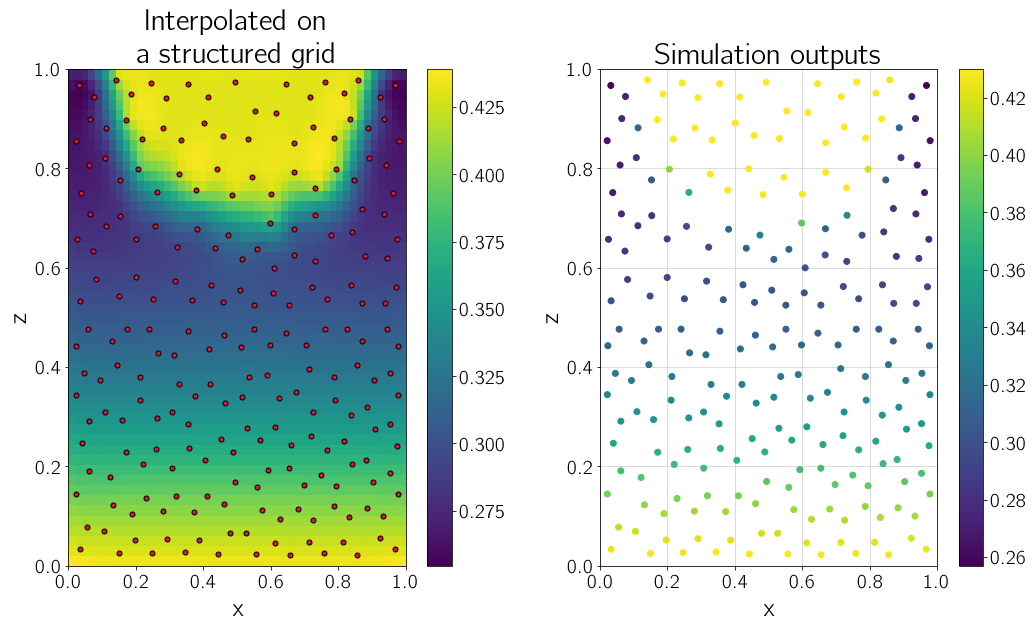

In [681]:
plt.figure(figsize=(15,15/1.618))
plt.subplot(121)
plt.pcolor(X_g,Y_g,z_dense_smooth_rbf)
plt.colorbar()
plt.scatter(x[:], z[:], marker=".", c="#DC143C", edgecolors="black", s=100)
plt.title("Interpolated on \n a structured grid")
plt.xlabel("x")
plt.ylabel("z")


plt.subplot(122)
plt.scatter(x[:], z[:], c=theta[timeIndex,:], cmap='viridis', vmin=min(theta[timeIndex,:]), vmax=max(theta[timeIndex,:]))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.colorbar()
plt.title("Simulation outputs")
plt.xlabel("x")
plt.ylabel("z")

plt.tight_layout()

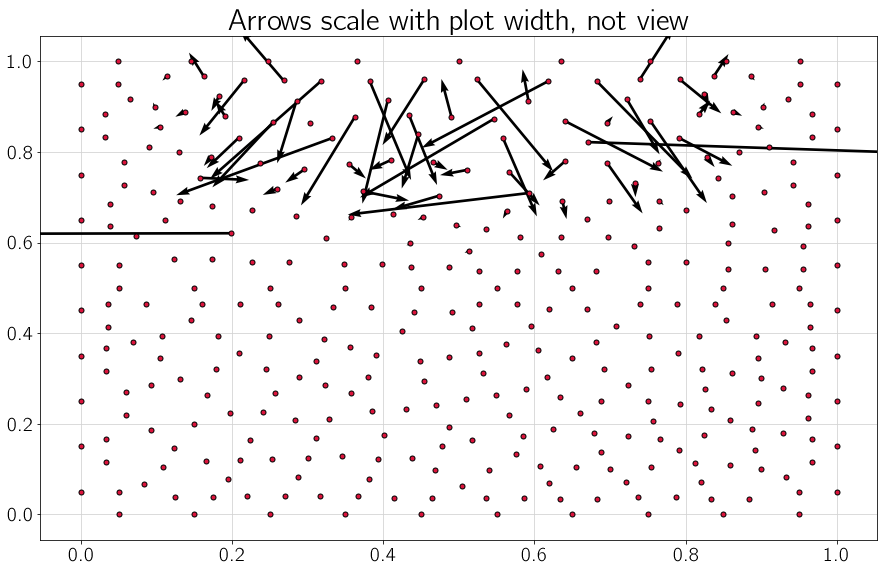

In [686]:
#timeIndex = 3
vel = (u[timeIndex,:]**2+v[timeIndex,:]**2)**0.5
U = u[timeIndex,:]
U[abs(U)<0.0000000001] = 0
U = U/vel
V = v[timeIndex,:]
V[abs(V)<0.0000000001] = 0
V = V/vel
zfun_smooth_rbf = interp.Rbf(xDual[:], zDual[:], vel, function='linear', smooth=0,epsilon=1)  # default smooth=0 for interpolation
z_dense_smooth_rbf = zfun_smooth_rbf(X_g, Y_g)  # not really a function, but a callable class instance


fig1, ax1 = plt.subplots(figsize=(15,15/1.618))
ax1.set_title('Arrows scale with plot width, not view')
#M = np.hypot(u[timeIndex,:], v[timeIndex,:])
#C = ax1.pcolor(X_g,Y_g,z_dense_smooth_rbf)
Q = ax1.quiver(xDual[:], zDual[:], u[timeIndex,:], v[timeIndex,:], units='x',scale=1e-4)

plt.scatter(xDual[:], zDual[:], marker=".", c="#DC143C", edgecolors="black", s=100)
#qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E', coordinates='figure')

In [664]:
vel

masked_array(data=[0.00000000e+00, 2.89791402e-07, 0.00000000e+00,
                   5.66155311e-08, 1.43350616e-07, 5.73435977e-07,
                   4.07084743e-08, 2.98506540e-08, 2.50926971e-08,
                   2.29596069e-06, 5.81311524e-06, 1.18453076e-05,
                   2.46898579e-08, 1.21458025e-07, 3.30188454e-07,
                   9.10765743e-07, 1.39555466e-06, 0.00000000e+00,
                   3.70102279e-06, 0.00000000e+00, 8.24359850e-07,
                   2.29937793e-06, 9.24457078e-09, 2.07518061e-08,
                   3.63099781e-08, 2.55549258e-08, 1.05429186e-10,
                   1.32768873e-08, 1.20405802e-08, 3.93525880e-08,
                   3.70091708e-07, 3.40245137e-08, 6.12242448e-05,
                   6.90143098e-07, 1.61547492e-07, 6.84445173e-07,
                   1.45841877e-07, 5.81918348e-07, 1.11226271e-07,
                   1.68868597e-07, 1.12688350e-07, 4.07967814e-07,
                   2.01383450e-06, 3.06703197e-06, 7.23335025e

In [423]:
v[0,:]

masked_array(data=[ 0.00000000e+00,  0.00000000e+00, -1.22930401e-04,
                   -3.85101752e-05, -1.80127903e-05,             inf,
                   -3.85101752e-05, -1.80127904e-05,             inf,
                    0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
                   -1.22930401e-04,  0.00000000e+00, -0.00000000e+00,
                    0.00000000e+00],
             mask=False,
       fill_value=1e+20)

In [420]:
velocity[0,:]

masked_array(data=[ 0.00000000e+00,  0.00000000e+00, -1.22930401e-04,
                    3.85101752e-05, -1.80127903e-05, -2.45524560e-15,
                    3.85101752e-05, -1.80127903e-05, -1.30554525e-14,
                    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                   -1.22930401e-04,  0.00000000e+00,  0.00000000e+00,
                    0.00000000e+00],
             mask=False,
       fill_value=1e+20)

In [413]:
xDual[:]

masked_array(data=[0.25, 0.  , 0.25, 0.25, 0.25, 0.5 , 0.75, 0.75, 0.5 ,
                   0.  , 0.25, 0.75, 0.75, 1.  , 0.75, 1.  ],
             mask=False,
       fill_value=1e+20)

In [414]:
zDual[:]

masked_array(data=[1.  , 0.75, 0.75, 0.5 , 0.25, 0.25, 0.5 , 0.25, 0.75,
                   0.25, 0.  , 1.  , 0.75, 0.75, 0.  , 0.25],
             mask=False,
       fill_value=1e+20)

In [367]:
psi[2,:]

masked_array(data=[0.66666667, 1.16666667, 1.16666667, 0.83333333,
                   1.33333333, 0.66666667, 1.33333333, 0.83333333],
             mask=False,
       fill_value=1e+20)

In [406]:
psi[1,:]

masked_array(data=[0.66666667, 1.16666667, 1.16666667, 0.83333333,
                   1.33333333, 0.66666667, 1.33333333, 0.83333333],
             mask=False,
       fill_value=1e+20)

In [408]:
psi[0,:]

masked_array(data=[-0.12489316, -0.27570796, -0.27570796, -0.34482078,
                   -0.12529597, -0.12489316, -0.12529597, -0.34482078],
             mask=False,
       fill_value=1e+20)

In [488]:
velocity

masked_array(data=[0.00000000e+00, 1.44616690e-08, 0.00000000e+00,
                   4.25490543e-12, 7.89381350e-14, 8.82570933e-15,
                   3.19912325e-11, 1.37013485e-10, 4.49598674e-18,
                   0.00000000e+00, 1.55968011e-19, 2.94767840e-16,
                   7.01012765e-17, 1.19750741e-16, 0.00000000e+00,
                   2.67561445e-15, 8.52964998e-17, 9.66996183e-17,
                   4.04733609e-18, 0.00000000e+00, 3.91280264e-12,
                   1.20890196e-13, 3.55748103e-12, 2.84283043e-10,
                   9.74875655e-09, 1.24548974e-08, 0.00000000e+00,
                   6.87921742e-17, 1.02857986e-17, 8.35093799e-09,
                   3.42280507e-10, 0.00000000e+00, 0.00000000e+00,
                   1.27645748e-08, 1.62534328e-11, 7.84528156e-12,
                   4.91919835e-10, 8.89890234e-09, 0.00000000e+00,
                   1.92576374e-08, 4.31614453e-10, 8.11599932e-09,
                   2.71339362e-13, 6.28641450e-12, 1.54909774e

In [407]:
z[:]

masked_array(data=[0.83333331, 0.33333334, 0.33333334, 0.66666669,
                   0.16666667, 0.83333331, 0.16666667, 0.66666669],
             mask=False,
       fill_value=1e+20)

In [524]:
u[u[:]>0.0000000001]

IndexError: 
Boolean array must have the same shape as the data along this dimension.

In [543]:
U

masked_array(data=[--, 0.8944271922363719, --, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, --, 0.0, 0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0,
                   --, 0.0, 0.0, 0.0, 0.902860521929446,
                   -0.8320502980091057, 0.6689647290509642, --, 0.0, 0.0,
                   -0.8320502959087551, 0.0, --, --, -0.44721359632426166,
                   0.0, 0.0, 0.7071067811865477, 0.7071067795616164, --,
                   -0.514495758294782, 0.26311740087029917,
                   0.7682212764669993, 0.0, 0.0, -0.8502651487866806, --,
                   0.0, 0.0, 0.0, 0.7071067850482933, 0.0, 0.0, 0.0, 0.0,
                   --, 0.0, 0.7415357817547684, --, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, -0.948683298775864, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, --, 0.0, --, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, --, --, 0.0,
      

In [535]:
V

masked_array(data=[--, -0.447213593027046, --, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, --, 0.0, 0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0,
                   --, 0.0, 0.0, 0.0, -0.4299335738707648,
                   -0.554700190718336, -0.7432941485615032, --, 0.0, 0.0,
                   -0.554700193868862, -1.0, --, --, -0.894427190587764,
                   0.0, 0.0, -0.7071067811865475, -0.7071067828114788, --,
                   -0.8574929239921909, -0.9647638225800438,
                   -0.6401844034209317, 0.0, 0.0, -0.5263546112258958, --,
                   0.0, 0.0, 0.0, -0.7071067773248019, 0.0, 0.0, 0.0, 0.0,
                   --, 0.0, -0.6709133210611817, --, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, -0.3162277638407871, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, --, 0.0, --, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, --, --, 0.0,

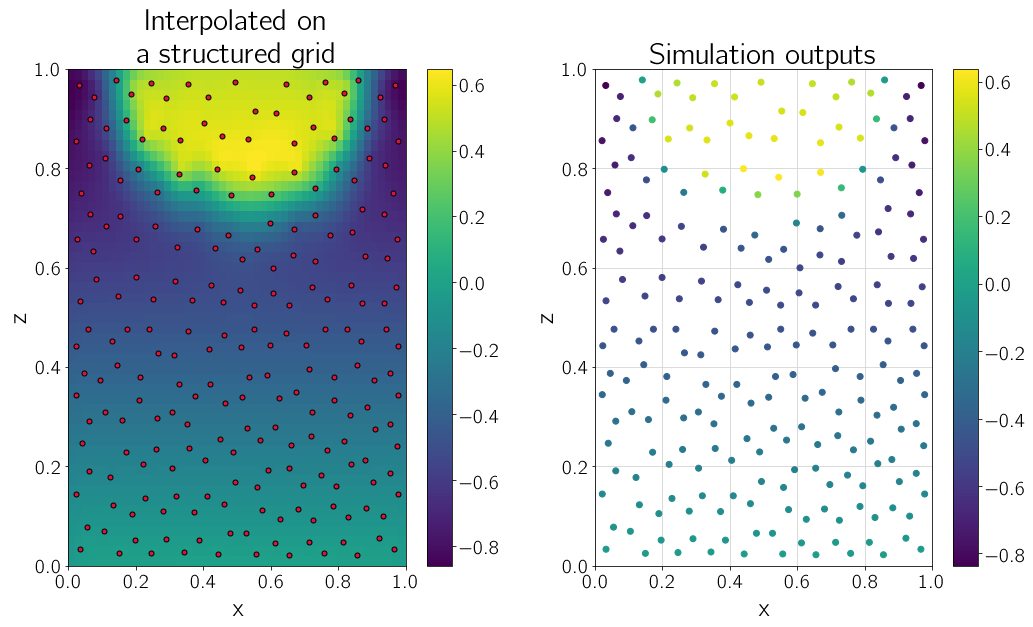

In [659]:
plt.figure(figsize=(15,15/1.618))
plt.subplot(121)
plt.pcolor(X_g,Y_g,z_dense_smooth_rbf)
plt.colorbar()
plt.scatter(x[:], z[:], marker=".", c="#DC143C", edgecolors="black", s=100)
plt.title("Interpolated on \n a structured grid")
plt.xlabel("x")
plt.ylabel("z")


plt.subplot(122)
plt.scatter(x[:], z[:], c=psi[timeIndex,:], cmap='viridis', vmin=min(psi[timeIndex,:]), vmax=max(psi[timeIndex,:]))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.colorbar()
plt.title("Simulation outputs")
plt.xlabel("x")
plt.ylabel("z")

plt.tight_layout()